In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False
%matplotlib inline
plt.style.use('ggplot')

#### InvoiceNo: 发票号。名义上一个6位整数，唯一分配给每个事务。如果此代码以字母“c”开头，则表示取消。
#### StockCode: 商品ID。一个5位整数，唯一地分配给每个不同的产品。
#### Description: 商品描述
#### Quantity: 每笔交易中每个产品（项目）的数量。数字。
#### InvoiceDate: 发票日期和时间
#### UnitPrice: 单价,单位产品价格 ,英镑
#### CustomerID: 客户编号,唯一分配给每个客户
#### Country: 国家名称,每个客户居住的国家的名称

## 数据清洗

In [176]:
#导入数据
sales=pd.read_excel('Online Retail.xlsx',sheetname='Online Retail')
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [177]:
data=sales.copy()

In [178]:
# 去除重复值
rows=len(data)
data.drop_duplicates(inplace= True)
rows_new=len(data)
print('去除重复值%d行'%(rows-rows_new))

去除重复值5268行


In [179]:
# 查看空值
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [180]:
data.shape

(536641, 8)

In [181]:
#description 无用字段
#custormerID 空值较多,用0代替
(data['CustomerID']==0).any()

False

In [182]:
# 填充缺失的CustomerID
data['CustomerID'].fillna(0, inplace=True)

In [183]:
(data['CustomerID']==0).sum()

135037

In [184]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [185]:
data['CustomerID']=data['CustomerID'].astype('int64')

In [186]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [187]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [188]:
# 计算总价
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [189]:
#异常值处理
data.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,11435.904653,18.123861
std,219.130156,97.233118,6795.044250,380.656263
min,-80995.000000,-11062.060000,0.000000,-168469.600000
25%,1.000000,1.250000,0.000000,3.750000
50%,3.000000,2.080000,14336.000000,9.870000
75%,10.000000,4.130000,16241.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [190]:
#检查数量异常值
data[data['Quantity']<0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,-39.60
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,-25.50


In [191]:
#C 开头的表示取消的订单

In [192]:
#检查单价异常值
data[data['UnitPrice']<=0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,0,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,0,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,0,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,0,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,0,United Kingdom,0.0


In [193]:
# C开头订单
data_C=data[data['InvoiceNo'].str.contains('C')==True]
# A开头订单
data_A=data[data['InvoiceNo'].str.contains('A')==True]

In [194]:
data.drop(data_C.index.tolist(),inplace=True,axis=0)
data.drop(data_A.index.tolist(),inplace=True,axis=0)

In [195]:
data['InvoiceNo'].str.contains('C').value_counts()

Series([], Name: InvoiceNo, dtype: int64)

In [196]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,527387.000000,527387.000000,527387.000000,527387.000000
mean,10.311325,3.882936,11384.396415,20.157965
std,160.367740,32.629981,6828.164841,270.623310
min,-9600.000000,0.000000,0.000000,-0.000000
25%,1.000000,1.250000,0.000000,3.780000
50%,3.000000,2.080000,14320.000000,9.900000
75%,11.000000,4.130000,16241.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [197]:
data[data['Quantity']<0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,0,United Kingdom,-0.0
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,0,United Kingdom,-0.0
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,0,United Kingdom,-0.0
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,0,United Kingdom,-0.0
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,0,United Kingdom,-0.0
7192,537000,21414,NaN,-22,2010-12-03 15:32:00,0.0,0,United Kingdom,-0.0
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.0,0,United Kingdom,-0.0
7195,537003,85126,NaN,-2,2010-12-03 15:33:00,0.0,0,United Kingdom,-0.0
7196,537004,21814,NaN,-30,2010-12-03 15:34:00,0.0,0,United Kingdom,-0.0
7197,537005,21692,NaN,-70,2010-12-03 15:35:00,0.0,0,United Kingdom,-0.0


In [198]:
data[data['Quantity']<0].shape

(1336, 9)

In [199]:
data[data['Quantity']<0].index

Int64Index([  2406,   4347,   7188,   7189,   7190,   7192,   7193,   7195,
              7196,   7197,
            ...
            535327, 535328, 535329, 535330, 535331, 535333, 535335, 535336,
            536908, 538919],
           dtype='int64', length=1336)

In [200]:
# 订单号未以C开头,但数量为负,视为异常订单,删除
data.drop(data[data['Quantity']<0].index.tolist(),inplace=True,axis=0)

In [201]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,526051.000000,526051.000000,526051.000000,526051.000000
mean,10.730929,3.892797,11413.309113,20.209160
std,157.592285,32.670802,6812.654009,270.964832
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.250000,0.000000,3.900000
50%,4.000000,2.080000,14334.000000,9.920000
75%,11.000000,4.130000,16242.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [202]:
#重设索引
data.reset_index(drop=True, inplace = True)

In [203]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


## 描述性分析

### 1.订单角度分析

In [206]:
data_InvoiceNo=data.groupby('InvoiceNo')[['Quantity', 'TotalPrice']].sum()

In [207]:
data_InvoiceNo.describe()

,Quantity,TotalPrice
count,20725.000000,20725.000000
mean,272.377129,512.957720
std,944.080005,1748.601066
min,1.000000,0.000000
25%,63.000000,137.770000
50%,145.000000,297.320000
75%,288.000000,480.340000
max,80995.000000,168469.600000


Text(0.5, 0, 'TotalPrice')

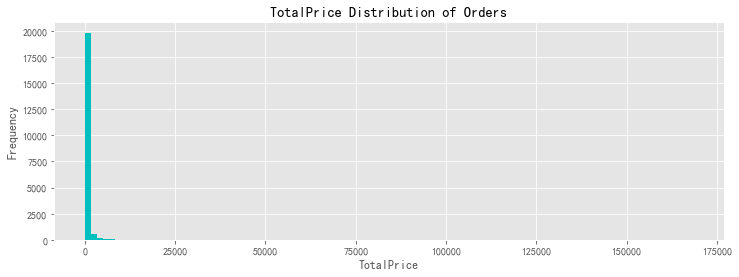

In [209]:
data_InvoiceNo['TotalPrice'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('TotalPrice Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('TotalPrice')

In [ ]:
#由于金额差距过大,缩小金额至2000进行观察

Text(0.5, 0, 'TotalPrice')

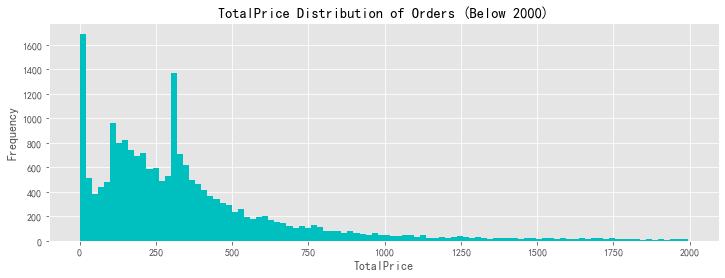

In [214]:
data_InvoiceNo[data_InvoiceNo['TotalPrice'] < 2000]['TotalPrice'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('TotalPrice Distribution of Orders (Below 2000)')
plt.ylabel('Frequency')
plt.xlabel('TotalPrice')

Text(0.5, 0, 'Quantity')

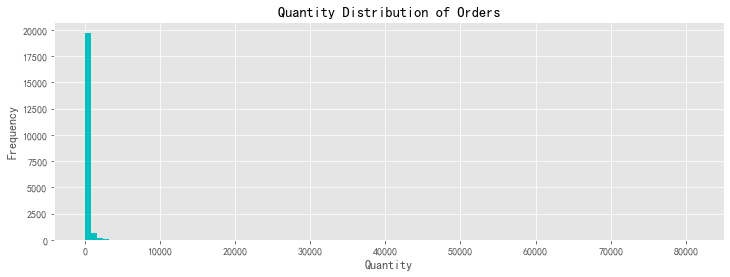

In [219]:
data_InvoiceNo['Quantity'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('Quantity Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

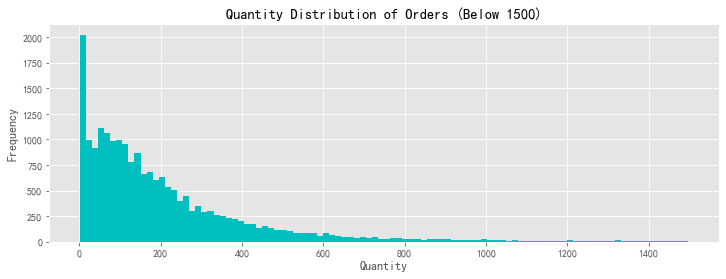

In [222]:
data_InvoiceNo[data_InvoiceNo['Quantity']<1500]['Quantity'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('Quantity Distribution of Orders (Below 1500)')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

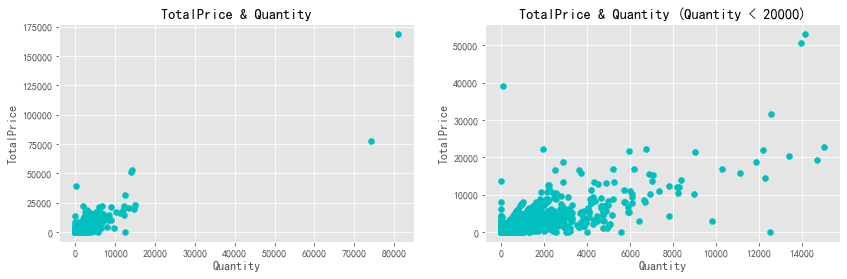

In [223]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(data_InvoiceNo['Quantity'], data_InvoiceNo['TotalPrice'], color = 'c')
plt.title('TotalPrice & Quantity')
plt.ylabel('TotalPrice')
plt.xlabel('Quantity')

plt.subplot(122)
plt.scatter(data_InvoiceNo[data_InvoiceNo.Quantity < 20000]['Quantity'], data_InvoiceNo[data_InvoiceNo.Quantity < 20000]['TotalPrice'], color = 'c')
plt.title('TotalPrice & Quantity (Quantity < 20000)')
plt.ylabel('TotalPrice')
plt.xlabel('Quantity')

####  平均每笔订单总价512.96英镑,平均每笔订单件数273.38件
####  订单总价集中在0-1000英镑之间,三个波峰出现在0-50英镑,100-150英镑,300-350英镑
####  订单商品数量呈长尾分布,主要聚集在600件以内,商品数量越多,订单越少

### 2.客户角度分析

In [225]:
#由于ID为0的客户太多,不考虑对0进行分析
data_CustomerID=data[data['CustomerID']!=0]

In [238]:
#根据 CustomerID 和 InvoiceNo 分组求和数量和总价
customer_grouped = data_CustomerID.groupby(['CustomerID', 'InvoiceNo'])[['Quantity', 'TotalPrice']].sum().reset_index()
#根据CustomerID求和订单数,总件数,总价
customer_grouped = customer_grouped.groupby('CustomerID').agg({'InvoiceNo': 'count', 'Quantity': 'sum', 'TotalPrice': 'sum'})
customer_grouped.describe()

,InvoiceNo,Quantity,TotalPrice
count,4339.000000,4339.000000,4339.000000
mean,4.271952,1190.570638,2048.215924
std,7.705493,5053.148160,8984.248352
min,1.000000,1.000000,0.000000
25%,1.000000,159.000000,306.455000
50%,2.000000,378.000000,668.560000
75%,5.000000,990.500000,1660.315000
max,210.000000,197491.000000,280206.020000


Text(0.5, 0, 'Quantity')

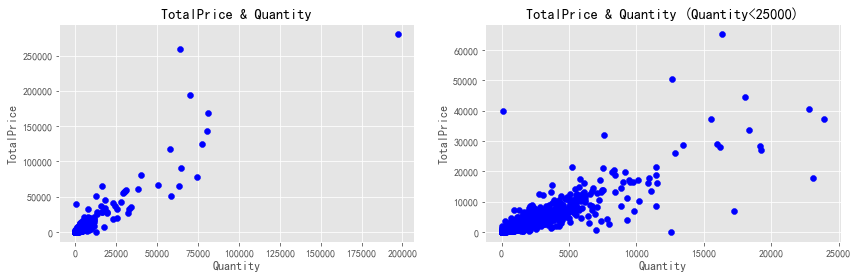

In [239]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(customer_grouped['Quantity'], customer_grouped['TotalPrice'], color = 'b')
plt.title('TotalPrice & Quantity')
plt.ylabel('TotalPrice')
plt.xlabel('Quantity')

plt.subplot(122)
plt.scatter(customer_grouped[customer_grouped.Quantity < 25000]['Quantity'], customer_grouped[customer_grouped.Quantity < 25000]['TotalPrice'], color = 'b')
plt.title('TotalPrice & Quantity (Quantity<25000)')
plt.ylabel('TotalPrice')
plt.xlabel('Quantity')

Text(0.5, 0, 'TotalPrice')

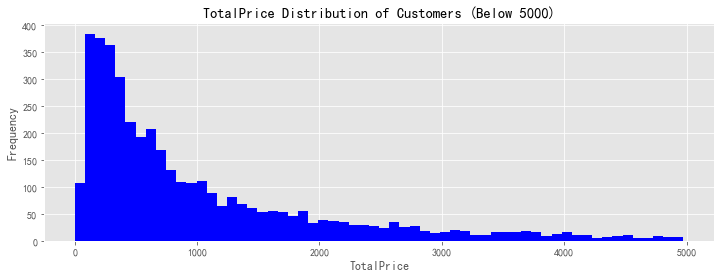

In [241]:
customer_grouped[customer_grouped.TotalPrice < 5000].TotalPrice.hist(bins = 60, figsize = (12, 4), color = 'b')
plt.title('TotalPrice Distribution of Customers (Below 5000)')
plt.ylabel('Frequency')
plt.xlabel('TotalPrice')

#### 人均购买笔数为4笔，中位数为2笔，25%以上的客户仅下过一次单，并未留存。每位客户平均购买了1190件商品，甚至超过了Q3分位数，最多的客户购买了197491件；订单总价均值为2048英镑，平均值同样超过了Q3分位数，说明客户的购买力存在较大差距，存在小部分的高消费用户拉高了人均数值。
#### 与前面订单金额的多峰分布相比，客户消费金额的分布呈现单峰长尾形态，金额更为集中，峰值在100-300英镑间。

### 3.商品角度分析

In [248]:
data['StockCode'].value_counts()

85123A      2258
85099B      2112
22423       2009
47566       1700
20725       1582
84879       1476
22197       1418
22720       1394
21212       1352
22383       1307
20727       1301
22457       1255
23203       1243
22386       1232
22469       1220
21931       1194
22086       1184
22411       1180
22961       1164
22382       1164
23298       1163
20728       1162
22960       1134
POST        1130
22666       1126
23209       1115
82482       1106
22384       1101
22993       1090
22699       1074
            ... 
84963A         1
79323B         1
23449          1
22016          1
90178B         1
90184c         1
90126A         1
46776b         1
46776e         1
84206B         1
90060B         1
90025B         1
85044          1
90026A         1
85109          1
35597B         1
85119          1
85126          1
47579          1
DCGS0004       1
85224          1
84569C         1
47016          1
84611B         1
72814          1
20678          1
21839          1
20703         

In [259]:
data_goods = data.groupby('StockCode')[['Quantity', 'TotalPrice']].sum()
data_goods['AvgPrice'] = data_goods['TotalPrice'] / data_goods['Quantity']
data_goods.head()

,Quantity,TotalPrice,AvgPrice
StockCode,,,
10002,1040,759.89,0.730663
10080,495,119.09,0.240586
10120,192,40.32,0.210000
10125,1295,993.99,0.767560
10133,2856,1539.60,0.539076


Text(0.5, 0, 'TotalPrice')

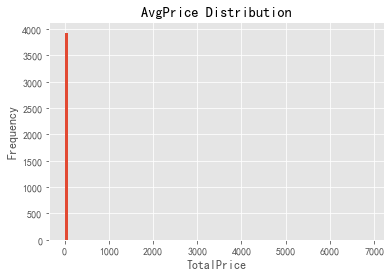

In [252]:
data_goods.AvgPrice.hist(bins=100)
plt.title('AvgPrice Distribution')
plt.ylabel('Frequency')
plt.xlabel('AvgPrice')

Text(0.5, 0, 'AvgPrice')

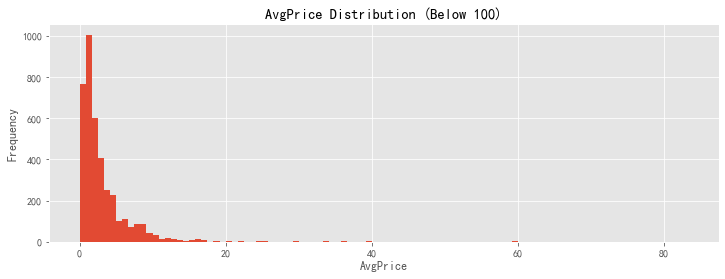

In [253]:
data_goods[data_goods.AvgPrice < 100].AvgPrice.hist(bins=100,figsize = (12, 4))
plt.title('AvgPrice Distribution (Below 100)')
plt.ylabel('Frequency')
plt.xlabel('AvgPrice')

Text(0.5, 0, 'AvgPrice')

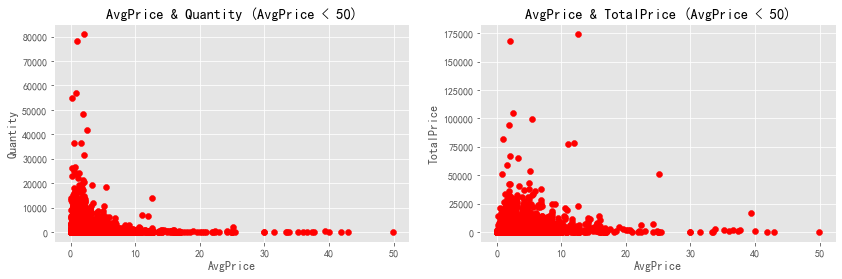

In [262]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(data_goods[data_goods.AvgPrice < 50]['AvgPrice'], data_goods[data_goods.AvgPrice < 50]['Quantity'], color = 'r')
plt.title('AvgPrice & Quantity (AvgPrice < 50)')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')

plt.subplot(122)
plt.scatter(data_goods[data_goods.AvgPrice < 50]['AvgPrice'], data_goods[data_goods.AvgPrice < 50]['TotalPrice'], color = 'r')
plt.title('AvgPrice & TotalPrice (AvgPrice < 50)')
plt.ylabel('TotalPrice')
plt.xlabel('AvgPrice')

#### 商品单价处于10英镑以下的销量最多,并且销售总额占比也相当大

### 4.顾客国籍分析

In [273]:
data_country=data.groupby('Country').agg({'CustomerID':'count','Quantity':'sum','TotalPrice':'sum'})
data_country['AvgPay']=data_country['TotalPrice']/data_country['CustomerID']
data_country

,CustomerID,Quantity,TotalPrice,AvgPay
Country,,,,
Australia,1184,84199,1.384538e+05,116.937340
Austria,398,4881,1.019868e+04,25.624824
Bahrain,18,314,7.541400e+02,41.896667
Belgium,2031,23237,4.119634e+04,20.283772
Brazil,32,356,1.143600e+03,35.737500
Canada,151,2763,3.666380e+03,24.280662
Channel Islands,747,9485,2.044054e+04,27.363507
Cyprus,603,6340,1.350285e+04,22.392786
Czech Republic,25,671,8.267400e+02,33.069600


Text(0.5, 0, 'Country')

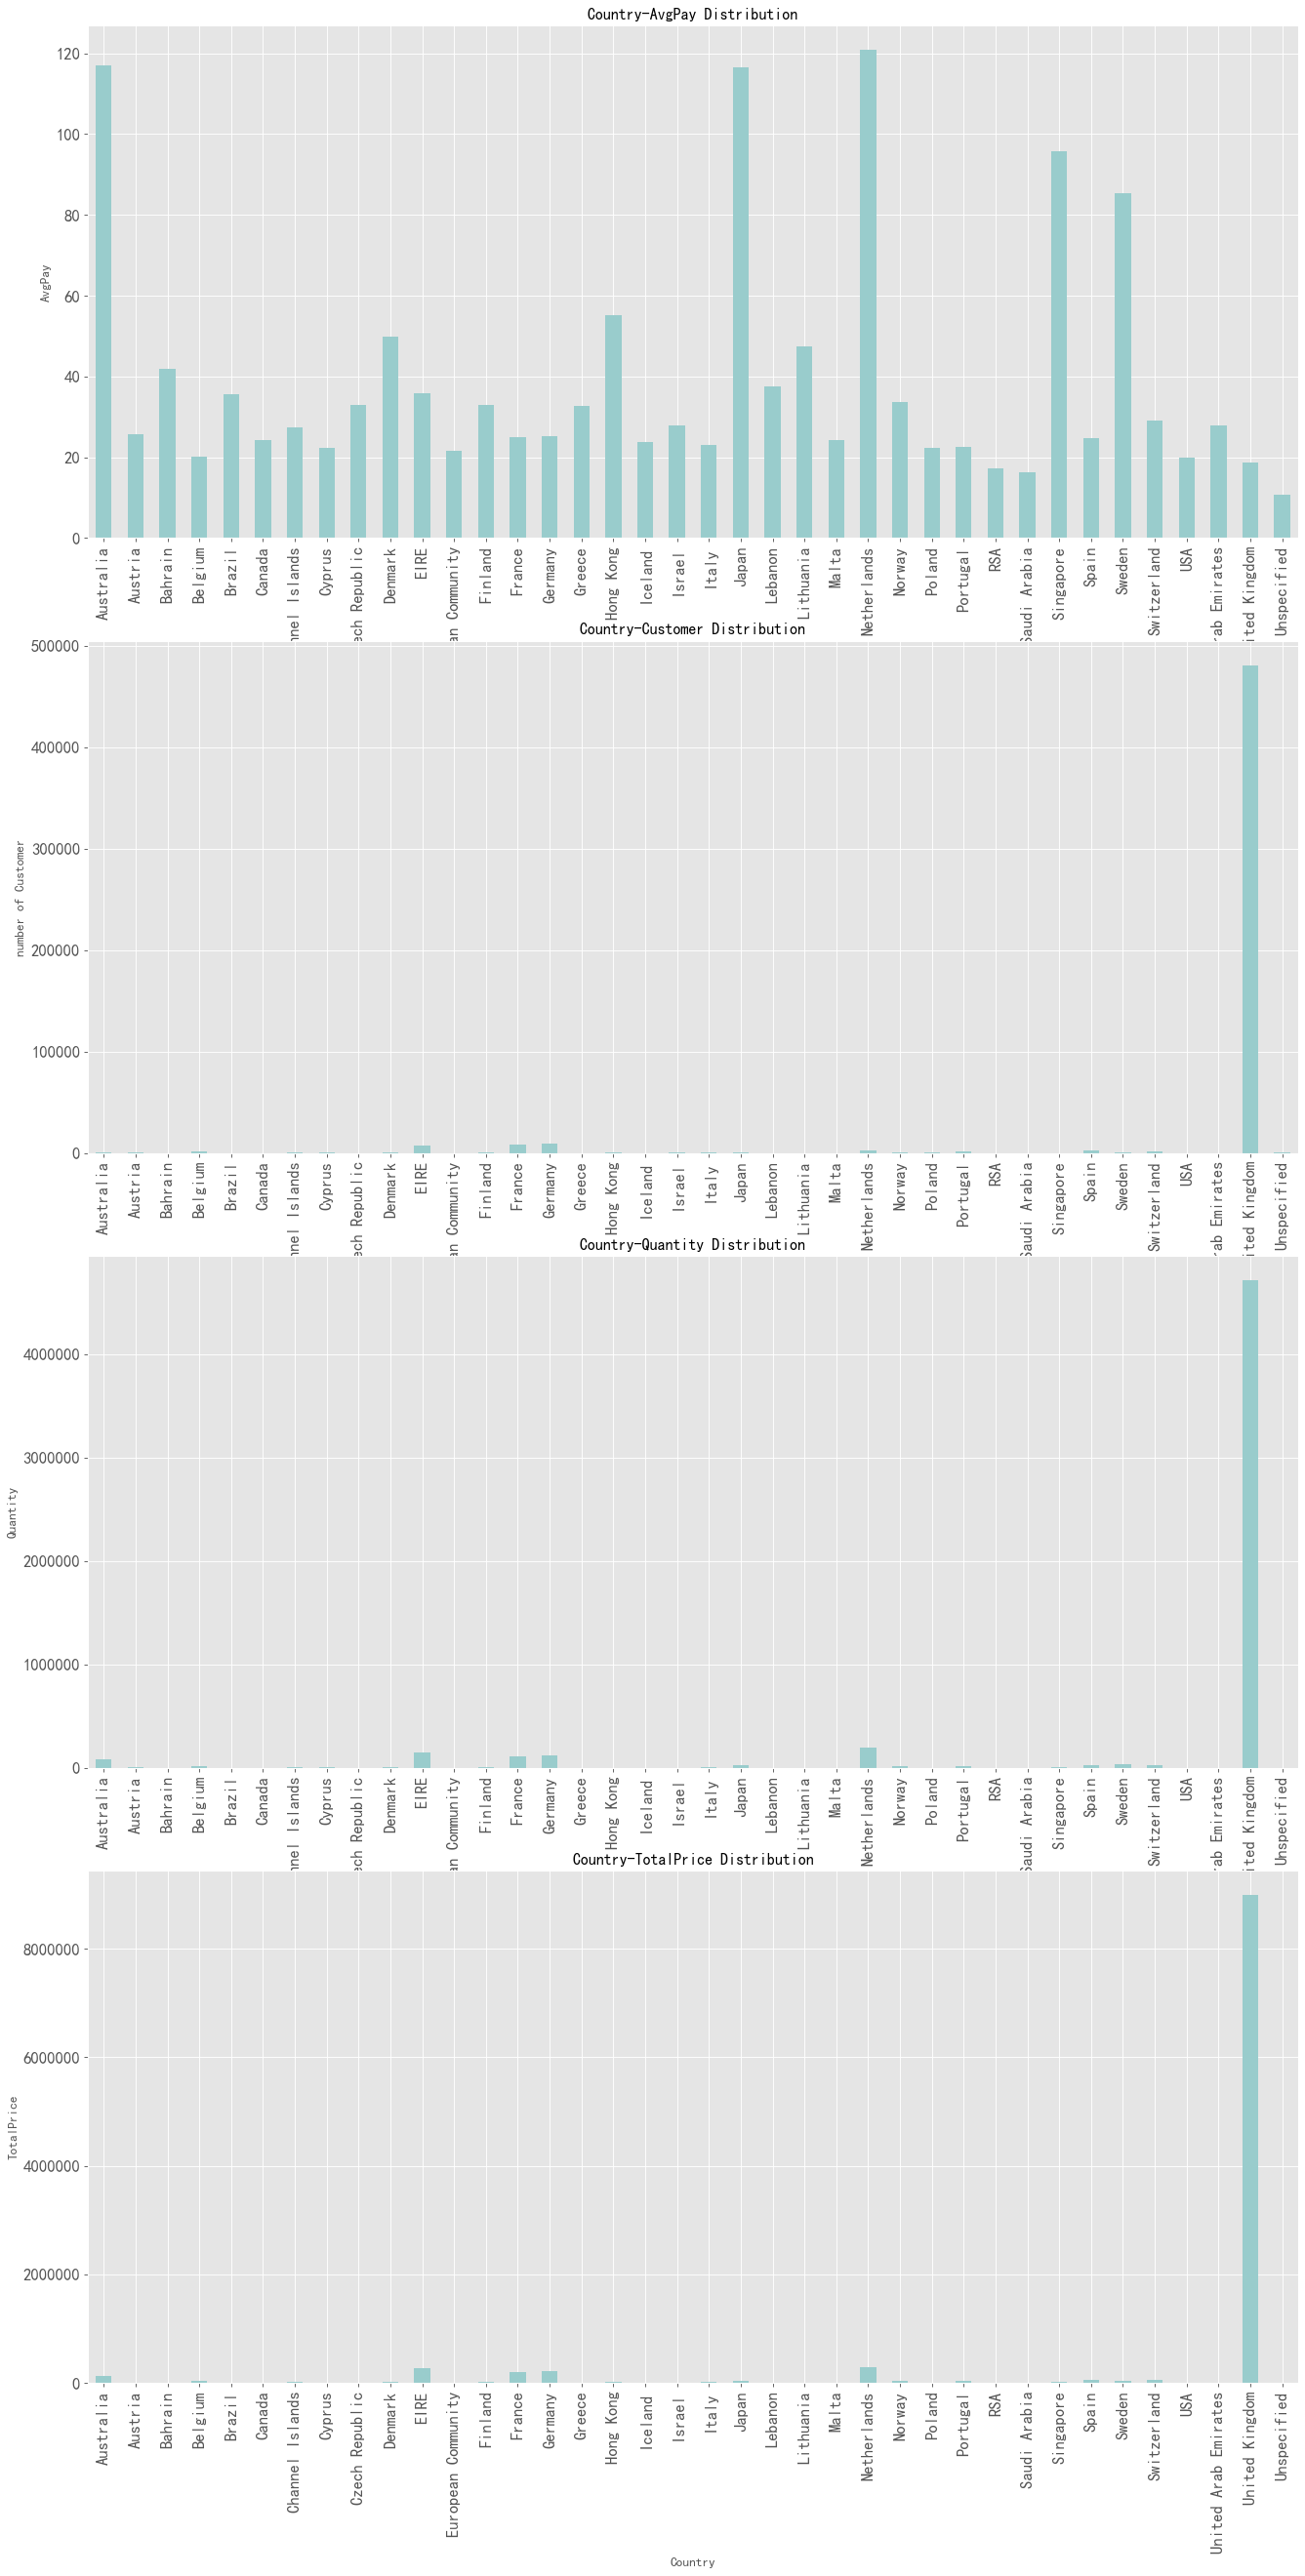

In [335]:
plt.subplots(4,1,dpi=80,figsize=(20,40))
plt.subplot(4,1,1)
data_country['AvgPay'].plot(kind='bar',color='#99CCCC',fontsize=15)
plt.title('Country-AvgPay Distribution')
plt.ylabel('AvgPay')
plt.xlabel('Country')

plt.subplot(4,1,2)
data_country['CustomerID'].plot(kind='bar',color='#99CCCC',fontsize=15)
plt.title('Country-Customer Distribution')
plt.ylabel('number of Customer')
plt.xlabel('Country')

plt.subplot(4,1,3)
data_country['Quantity'].plot(kind='bar',color='#99CCCC',fontsize=15)
plt.title('Country-Quantity Distribution')
plt.ylabel('Quantity')
plt.xlabel('Country')

plt.subplot(4,1,4)
data_country['TotalPrice'].plot(kind='bar',color='#99CCCC',fontsize=15)
plt.title('Country-TotalPrice Distribution')
plt.ylabel('TotalPrice')
plt.xlabel('Country')

#### 人均购买能力以Australia,Japan,Netherlands	,Singapore四国领先,人均消费100-120英镑
#### 而客户数量,购买商品数量,消费总价则由United Kingdom一枝独秀

### 5.时间角度分析

In [341]:
data_time=data.copy()
data_time['Date'] = pd.to_datetime(data_time['InvoiceDate'].dt.date, errors='coerce')
data_time.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [342]:
data_time=data_time.groupby('Date').agg({'InvoiceNo':'count','Quantity':'sum','TotalPrice':'sum'})

In [343]:
data_time.rename(columns={'InvoiceNo':'OrderCount','TotalPrice':'TotalCharges'},inplace=True)

In [344]:
data_time

,OrderCount,Quantity,TotalCharges
Date,,,
2010-12-01,3037,26906,58776.79
2010-12-02,2023,31283,47629.42
2010-12-03,2143,16430,46898.63
2010-12-05,2604,16243,31364.63
2010-12-06,3774,21775,54624.15
2010-12-07,2904,25324,99553.85
2010-12-08,2533,23049,45235.36
2010-12-09,2791,20698,53548.19
2010-12-10,2663,21031,59021.02


Text(0, 0.5, 'OrderCount')

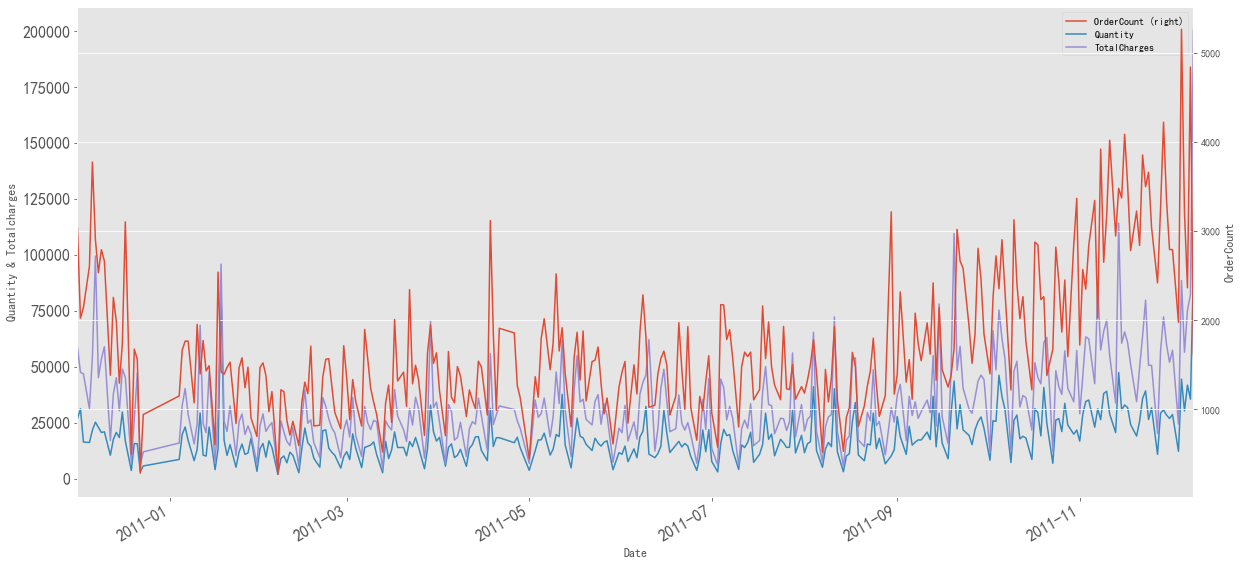

In [357]:
tt=data_time.plot(secondary_y = 'OrderCount',figsize=(20,10),fontsize=16)
tt.set_ylabel('Quantity & Totalcharges')
tt.right_ax.set_ylabel('OrderCount')

In [379]:
data_month=data.copy()
data_month['Month']=data_month['InvoiceDate'].dt.month

In [380]:
data_month.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12


In [381]:
data_month=data_month[data_month['InvoiceDate']>'2010-12-31 08:26:00'].groupby('Month').agg({'InvoiceNo':'count','Quantity':'sum','TotalPrice':'sum'})
data_month.rename(columns={'InvoiceNo':'OrderCount','TotalPrice':'TotalCharges'},inplace=True)
data_month

,OrderCount,Quantity,TotalCharges
Month,,,
1,34104,397030,689811.610
2,26961,286074,522545.560
3,35609,384023,716215.260
4,28957,311314,536968.491
5,36044,398686,769296.610
6,35793,393633,760547.010
7,38466,405473,718076.121
8,34344,424263,746779.320
9,48962,574169,1056435.192


Text(0, 0.5, 'OrderCount')

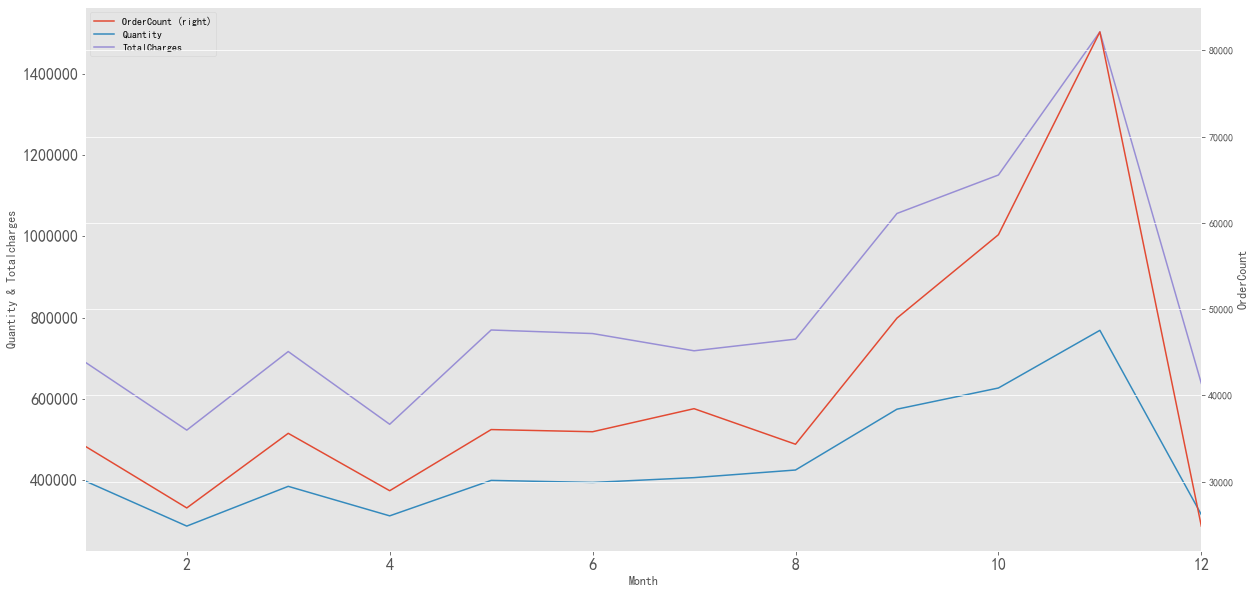

In [382]:
mm=data_month.plot(secondary_y = 'OrderCount',figsize=(20,10),fontsize=16)
mm.set_ylabel('Quantity & Totalcharges')
mm.right_ax.set_ylabel('OrderCount')

#### 由于12月只有九天的数据,照当前数据估算,12月业绩将持续上升

#### 观察到三条折线总体上呈现相近的趋势，除了2011年2月和4月略低外，2011年1月至2011年8月基本维持相近的销售情况,2011年9月-11月增长迅速

### 6.客户消费行为分析

#### 6.1 客户生命周期 

In [394]:
data_customer=data[data['CustomerID']!=0].copy()
data_customer['InvoiceDate']=data_customer['InvoiceDate'].dt.date

In [395]:
data_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [401]:
(data_customer['CustomerID']==0).value_counts()

False    392732
Name: CustomerID, dtype: int64

In [432]:
# 客户的初次消费时间
mindate = data_customer.groupby('CustomerID')[['InvoiceDate']].min()
# 客户的末次消费时间
maxdate = data_customer.groupby('CustomerID')[['InvoiceDate']].max()
(maxdate - mindate).head(5)

,InvoiceDate
CustomerID,
12346,0 days
12347,365 days
12348,283 days
12349,0 days
12350,0 days


In [433]:
life_time = maxdate - mindate
life_time.describe()

,InvoiceDate
count,4339
mean,130 days 17:47:38.262272
std,132 days 05:02:39.203408
min,0 days 00:00:00
25%,0 days 00:00:00
50%,93 days 00:00:00
75%,252 days 00:00:00
max,373 days 00:00:00


In [434]:
life_time['life_time'] = life_time['InvoiceDate'].dt.days

Text(0.5, 0, 'Life time (days)')

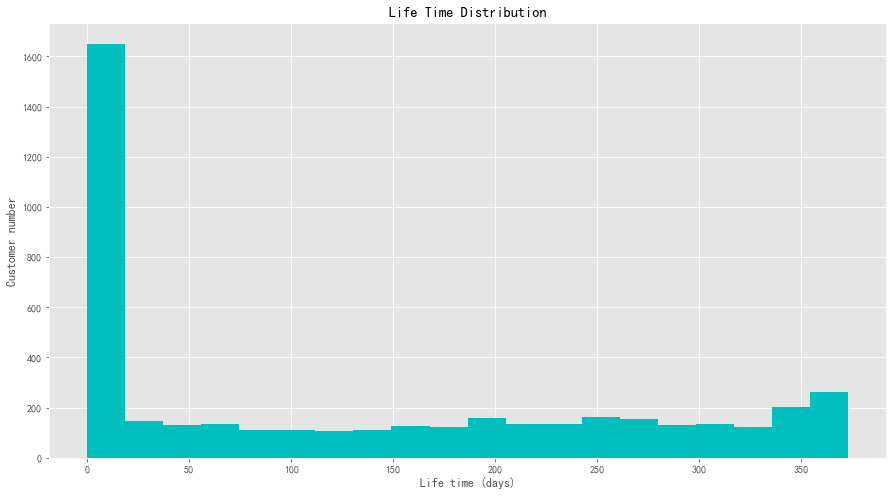

In [435]:
life_time['life_time'].hist(bins = 20, color = 'c',figsize=(15,8))
plt.title('Life Time Distribution')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')

In [436]:
# 流失客户人数
life_time[life_time['life_time'] == 0].count()/life_time[life_time['life_time'] != 0].count()

InvoiceDate    0.555197
life_time      0.555197
dtype: float64

Text(0.5, 0, 'Life time (days)')

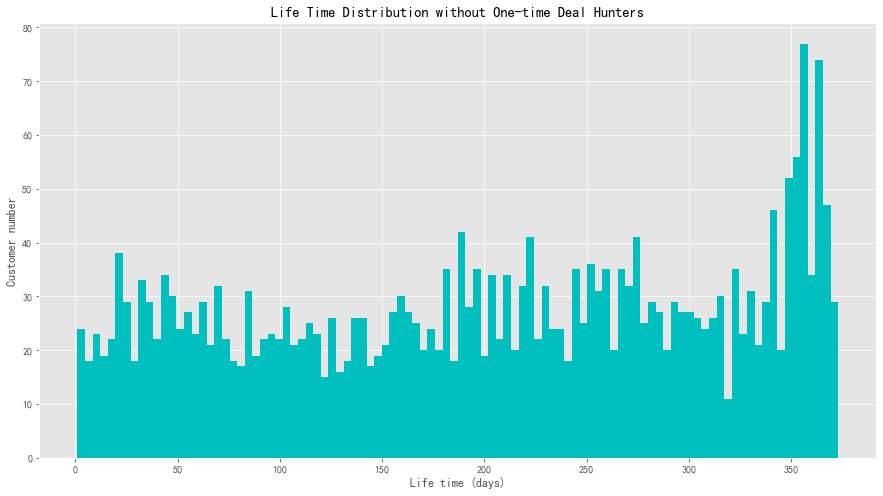

In [437]:
#0为只购买过一次的客户,舍弃
life_time[life_time['life_time'] > 0].life_time.hist(bins = 100, figsize = (15, 8), color = 'c')
plt.title('Life Time Distribution without One-time Deal Hunters')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')

In [438]:
bin = [0,50,100,150,200,250,300,350,400]
pd.cut(life_time[life_time['life_time'] > 0].life_time, bins=bin).value_counts()

(250, 300]    397
(300, 350]    391
(200, 250]    372
(150, 200]    359
(0, 50]       345
(50, 100]     319
(350, 400]    317
(100, 150]    290
Name: life_time, dtype: int64

In [439]:
# 消费两次及以上的用户平均生命周期
np.round((life_time[life_time['life_time'] > 0]['life_time'].mean()))

203.0

#### 有一半的客户只购买过1次,生命周期在250-350天的客户最多,属于高质量客户的生命周期,消费次数两次及以上平均生命周期为203天高于总体均值130天

#### 6.2 客户留存情况

In [440]:
data_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [441]:
mindate.head()

,InvoiceDate
CustomerID,
12346,2011-01-18
12347,2010-12-07
12348,2010-12-16
12349,2011-11-21
12350,2011-02-02


In [445]:
mindate.reset_index(inplace=True)

In [447]:
data_retention=data_customer.merge(mindate,on='CustomerID',how='inner',suffixes = ('', 'Min'))
data_retention.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceDateMin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010-12-01


In [448]:
data_retention['diffdate']=(data_retention['InvoiceDate']-data_retention['InvoiceDateMin']).dt.days
data_retention.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceDateMin,diffdate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010-12-01,0


In [478]:
data_retention['diffdate'].value_counts()

0      105407
42       2083
245      1718
147      1634
160      1615
35       1594
56       1578
357      1546
112      1474
126      1446
49       1441
70       1433
301      1423
91       1422
62       1415
76       1407
252      1403
308      1391
343      1367
7        1349
21       1343
280      1343
105      1335
154      1327
294      1321
336      1297
322      1286
34       1286
41       1275
63       1260
        ...  
180       410
278       407
20        395
286       394
136       390
207       389
16        388
244       382
372       374
94        374
314       371
172       369
277       369
339       365
292       364
24        359
307       350
371       348
18        347
353       346
302       341
3         308
369       303
360       295
264       287
327       268
332       247
368       244
367       233
373       127
Name: diffdate, Length: 374, dtype: int64

In [461]:
date_bins = [0, 3, 7, 30, 60, 90, 180]
data_reten
tion['diffdateBin'] = pd.cut(data_retention.diffdate, bins = date_bins)
data_retention['diffdateBin'].value_counts()

(90, 180]    74533
(30, 60]     28256
(60, 90]     25878
(7, 30]      17151
(3, 7]        3559
(0, 3]        1311
Name: diffdateBin, dtype: int64

In [463]:
#数据透视表观察留存情况
retention_pivot = data_retention.pivot_table(index = ['CustomerID'], columns = ['diffdateBin'], values = ['TotalPrice'], aggfunc= np.sum)
retention_pivot.head()

TotalPrice                                           
diffdateBin     (0, 3] (3, 7] (7, 30] (30, 60] (60, 90] (90, 180]
CustomerID                                                       
12346              NaN    NaN     NaN      NaN      NaN       NaN
12347              NaN    NaN     NaN   475.39      NaN    636.25
12348              NaN    NaN     NaN   227.44      NaN    367.00
12349              NaN    NaN     NaN      NaN      NaN       NaN
12350              NaN    NaN     NaN      NaN      NaN       NaN

In [479]:
retention_pivot.mean()

            diffdateBin
TotalPrice  (0, 3]         587.662911
            (3, 7]         366.199325
            (7, 30]        518.498174
            (30, 60]       595.992305
            (60, 90]       593.322921
            (90, 180]      984.703246
dtype: float64

In [480]:
# 将数据转换为0 1 表示,1代表有消费,0代表没有
retention_pivot_trans = retention_pivot.fillna(0).applymap(lambda x:1 if x > 0 else 0)
retention_pivot_trans.head()

TotalPrice                                           
diffdateBin     (0, 3] (3, 7] (7, 30] (30, 60] (60, 90] (90, 180]
CustomerID                                                       
12346                0      0       0        0        0         0
12347                0      0       0        1        0         1
12348                0      0       0        1        0         1
12349                0      0       0        0        0         0
12350                0      0       0        0        0         0

In [483]:
# 计算各时期客户留存占比
(retention_pivot_trans.sum()/ retention_pivot_trans.count())*100

            diffdateBin
TotalPrice  (0, 3]          1.820696
            (3, 7]          3.756626
            (7, 30]        15.372206
            (30, 60]       23.000691
            (60, 90]       21.226089
            (90, 180]      38.488131
dtype: float64

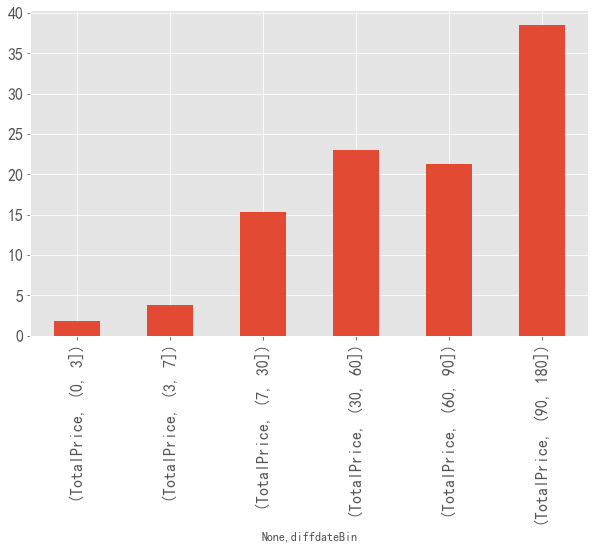

In [484]:
#绘制柱状图
((retention_pivot_trans.sum()/ retention_pivot_trans.count())*100).plot.bar(figsize=(10,6),fontsize=16)

#### 有1.8%的客户在第一次消费的次日至3天内有过消费
#### 3.8%的客户在4-7天有过消费
#### 分别有23.0%和21.2%的客户在首次消费后的第二个月内和第三个月内有过购买行为
#### 有38%的客户在90天至半年内消费过。

#### 6.3 购买周期

In [491]:
slaes_cycle=data_retention.copy()
sales_cycle = sales_cycle.drop_duplicates(subset=['CustomerID', 'InvoiceDate'], keep='first')
sales_cycle.sort_values(by = 'InvoiceDate',ascending = True,inplace=True)
sales_cycle

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceDateMin,diffdate,diffdateBin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010-12-01,0,NaN
15759,536537,22277,COSMETIC BAG VINTAGE ROSE PAISLEY,36,2010-12-01,2.10,15922,United Kingdom,75.60,2010-12-01,0,NaN
15770,536538,21466,RED FLOWER CROCHET FOOD COVER,1,2010-12-01,3.75,14594,United Kingdom,3.75,2010-12-01,0,NaN
15822,536539,22969,HOMEMADE JAM SCENTED CANDLES,12,2010-12-01,1.45,15165,United Kingdom,17.40,2010-12-01,0,NaN
15849,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01,9.95,14911,EIRE,39.80,2010-12-01,0,NaN
14570,536524,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",6,2010-12-01,2.95,17572,United Kingdom,17.70,2010-12-01,0,NaN
6815,536405,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,128,2010-12-01,2.55,14045,United Kingdom,326.40,2010-12-01,0,NaN
3668,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01,6.45,18074,United Kingdom,19.35,2010-12-01,0,NaN
9285,536488,22738,RIBBON REEL SNOWY VILLAGE,5,2010-12-01,1.65,17897,United Kingdom,8.25,2010-12-01,0,NaN
7853,536420,21889,WOODEN BOX OF DOMINOES,12,2010-12-01,1.25,16583,United Kingdom,15.00,2010-12-01,0,NaN


In [492]:
last_diff = sales_cycle.groupby('CustomerID').apply(lambda x:x.diffdate-x.diffdate.shift())

In [495]:
last_diff.head(20)
#  ID       Index      Diffdate

CustomerID        
12346       193915      NaN
12347       93557       NaN
            93588      50.0
            93617      71.0
            93641      63.0
            93659      54.0
            93681      90.0
            93728      37.0
12348       156834      NaN
            156851     40.0
            156857     70.0
            156862    173.0
12349       387769      NaN
12350       217624      NaN
12352       230315      NaN
            230330     13.0
            230338     16.0
            230345      5.0
            230353    182.0
            230371      8.0
Name: diffdate, dtype: float64

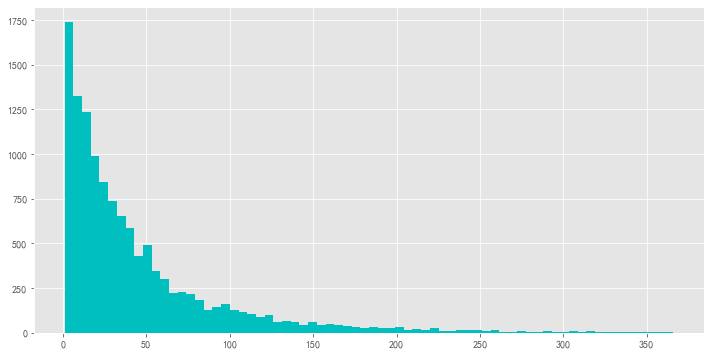

In [496]:
last_diff.hist(bins = 70, figsize = (12, 6), color = 'c')

#### 订单的购买周期消费间隔在50天以内为主,随着间隔天数增加,订单数量减少

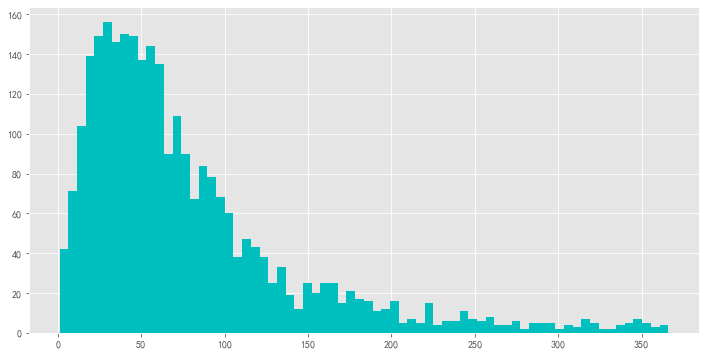

In [497]:
#对客户进行分组观察
last_diff_customer = last_diff.groupby('CustomerID').mean()
last_diff_customer.hist(bins = 70, figsize = (12, 6), color = 'c')

#### 峰值出现在20-70天之间

## 7.总计

### 1.订单
####  平均每笔订单总价512.96英镑,平均每笔订单件数273.38件
####  订单总价集中在0-1000英镑之间,三个波峰出现在0-50英镑,100-150英镑,300-350英镑
####  订单商品数量呈长尾分布,主要聚集在600件以内,商品数量越多,订单越少
### 2.客户
#### 人均购买笔数为4笔，中位数为2笔，25%以上的客户仅下过一次单，并未留存。每位客户平均购买了1190件商品，甚至超过了Q3分位数，最多的客户购买了197491件；订单总价均值为2048英镑，平均值同样超过了Q3分位数，说明客户的购买力存在较大差距，存在小部分的高消费用户拉高了人均数值。
#### 与前面订单金额的多峰分布相比，客户消费金额的分布呈现单峰长尾形态，金额更为集中，峰值在100-300英镑间。
### 3.商品
#### 商品单价处于10英镑以下的销量最多,并且销售总额占比也相当大
### 4.国家
#### 人均购买能力以Australia,Japan,Netherlands	,Singapore四国领先,人均消费100-120英镑
#### 而客户数量,购买商品数量,消费总价则由United Kingdom一枝独秀
### 5.时间
#### 观察到三条折线总体上呈现相近的趋势，除了2011年2月和4月略低外，2011年1月至2011年8月基本维持相近的销售情况,2011年9月-11月增长迅速
### 6.客户生命周期
#### 有一半的客户只购买过1次,生命周期在250-350天的客户最多,属于高质量客户的生命周期,消费次数两次及以上平均生命周期为203天高于总体均值130天
### 7.客户留存情况
#### 有1.8%的客户在第一次消费的次日至3天内有过消费
#### 3.8%的客户在4-7天有过消费
#### 分别有23.0%和21.2%的客户在首次消费后的第二个月内和第三个月内有过购买行为
#### 有38%的客户在90天至半年内消费过。 	
### 8.客户购买周期
#### 购买周期峰值出现在20-70天之间